# Week1 LAB: Bayesian Belief Update

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Case1: Beta-Binomial (unknown p)

In [2]:
from scipy.stats import binom, beta

### Sampling Density

In [3]:
p = 0.3
N = 15
np.random.seed(101)
data = binom.rvs(1, p, size=N)
print(data)
print(data.size)
print(data.sum())

[0 0 0 0 0 1 0 1 1 0 0 0 0 1 1]
15
5


### Prior Belief

Text(0, 0.5, 'p(theta)')

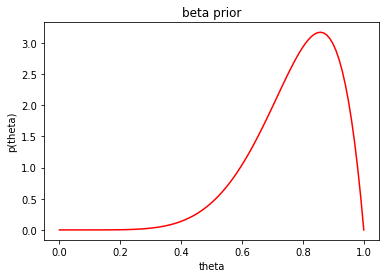

In [4]:
a = 7 ; b = 2
prior = beta(a, b)
theta = np.linspace(0, 1, 100)
plt.plot(theta, prior.pdf(theta), color='r')
plt.title('beta prior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

### Likelihood (Sampling Density)

(0, 0.0005)

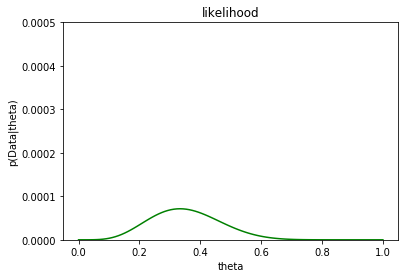

In [5]:
def likelihood(D, p):
    N = D.size ; suc = D.sum()
    theta = np.linspace(0, 1, 100)
    return p**suc*(1-p)**(N-suc)

plt.plot(theta, likelihood(data, theta), color='g')
plt.title('likelihood')
plt.xlabel('theta')
plt.ylabel('p(Data|theta)')
plt.ylim(0, 0.0005)

### Posterior: Updated Belief

Text(0, 0.5, 'p(theta)')

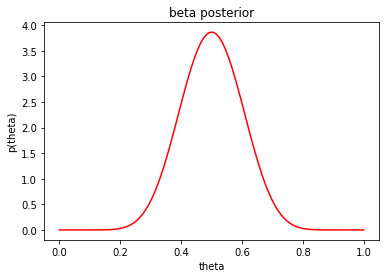

In [6]:
a_pos = a + data.sum()
b_pos = b + data.size - data.sum()
posterior = beta(a_pos, b_pos)
theta = np.linspace(0, 1, 100)
plt.plot(theta, posterior.pdf(theta), color='r')
plt.title('beta posterior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

(0, 4)

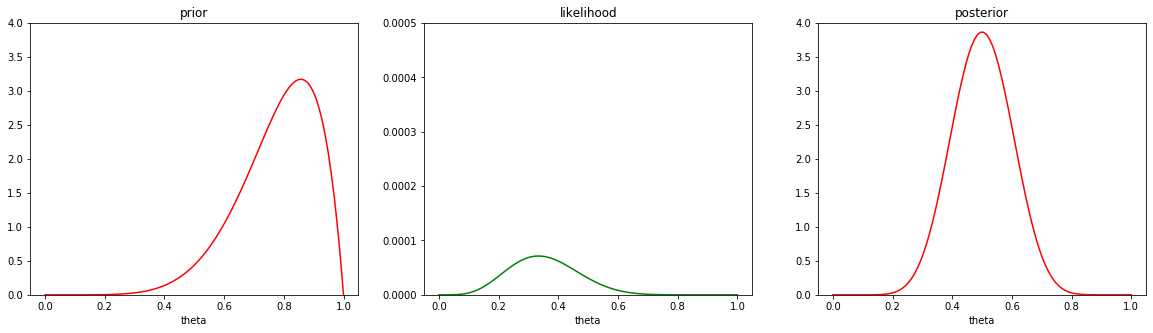

In [7]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.plot(theta, prior.pdf(theta), color='r')
ax1.set_title('prior')
ax1.set_xlabel('theta')
ax1.set_ylim(0,4)

ax2 = fig.add_subplot(132)
ax2.plot(theta, likelihood(data, theta), color='g')
ax2.set_title('likelihood')
ax2.set_xlabel('theta')
ax2.set_ylim(0, 0.0005)

ax3 = fig.add_subplot(133)
ax3.plot(theta, posterior.pdf(theta), color='r')
ax3.set_title('posterior')
ax3.set_xlabel('theta')
ax3.set_ylim(0, 4)

## Case 2: Gaussian-Gaussian (unknown $\mu$)

In [8]:
from scipy.stats import norm

### Sampling Density

In [9]:
N = 15
np.random.seed(101)
data2 = norm.rvs(21, 2, size=N)
print(data2)
print(data2.size)

[26.41369968 22.25626542 22.81593889 22.00765151 22.3022359  20.36136391
 19.30384603 22.2119307  16.96366351 22.48024411 22.05762699 19.82199893
 21.37739062 19.48225589 19.13352557]
15


### Prior Belief

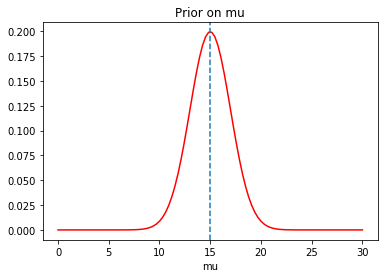

In [10]:
mu0 = 15 ; sigma0 = np.sqrt(2)
prior = norm(mu0, sigma0**2)
mu = np.linspace(0, 30, 100)
plt.plot(mu, prior.pdf(mu), color='r')
plt.title('Prior on mu')
plt.xlabel('mu')
plt.axvline(mu0, linestyle='--')

### Likelihood (Sampling Density)

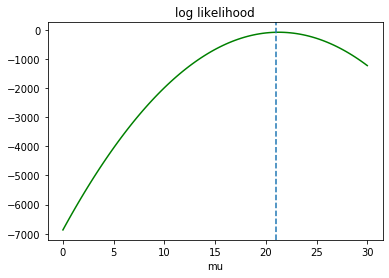

In [11]:
def loglikelihood(d, m):
    l = 0
    n = d.size
    for i in range(len(d)):
        l = l + np.log((1/np.sqrt(2*np.pi*sigma**2))*(np.exp(-(d[i]-m)**2/2*sigma**2)))
    return l

sigma = np.sqrt(2)
mu = np.linspace(0, 30, 100)
plt.plot(mu, loglikelihood(data2, mu), color='g')
plt.title('log likelihood')
plt.xlabel('mu')
plt.axvline(21, linestyle='--')

### Posterior: Updated Belief

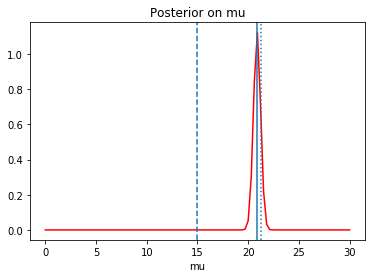

In [12]:
mu_pos = (mu0/sigma0**2+N*np.mean(data2)/sigma**2)/(1/sigma0**2+N/sigma**2)
sigmasq_pos = np.sqrt(1/(1/sigma0**2+N/sigma**2))
posterior = norm(mu_pos, sigmasq_pos)
mu = np.linspace(0, 30, 100)
plt.plot(mu, posterior.pdf(mu), color='r')
plt.title('Posterior on mu')
plt.xlabel('mu')
plt.axvline(mu0, linestyle='--')
plt.axvline(mu_pos, linestyle='-')
plt.axvline(np.mean(data2), linestyle=':')

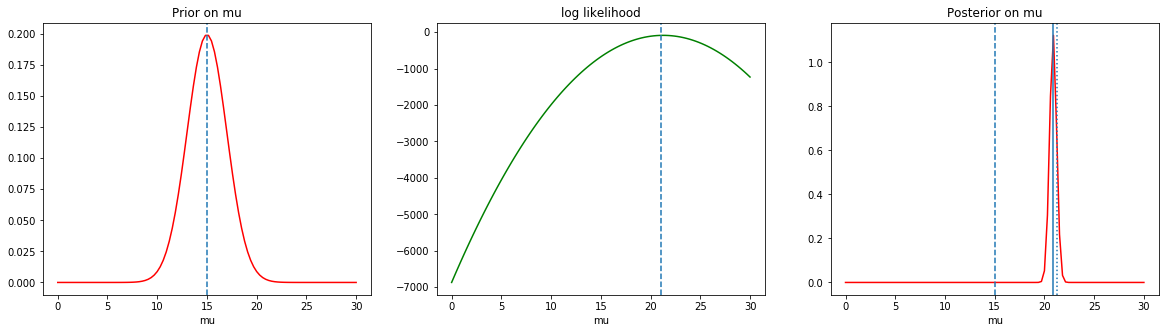

In [13]:
fig = plt.figure(figsize=(20,5))

bx1 = fig.add_subplot(131)
bx1.plot(mu, prior.pdf(mu), color='r')
bx1.set_title('Prior on mu')
bx1.set_xlabel('mu')
bx1.axvline(mu0, linestyle='--')

bx2 = fig.add_subplot(132)
bx2.plot(mu, loglikelihood(data2, mu), color='g')
bx2.set_title('log likelihood')
bx2.set_xlabel('mu')
bx2.axvline(21, linestyle='--')

bx3 = fig.add_subplot(133)
bx3.plot(mu, posterior.pdf(mu), color='r')
bx3.set_title('Posterior on mu')
bx3.set_xlabel('mu')
bx3.axvline(mu0, linestyle='--')
bx3.axvline(mu_pos, linestyle='-')
bx3.axvline(np.mean(data2), linestyle=':')